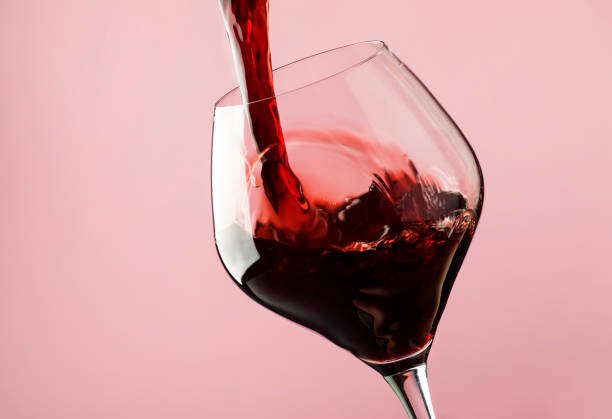

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv("QualityPrediction.csv")

In [55]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Description of Dataset
If you download the dataset, you can see that several features will be used to classify the quality of wine, many of them are chemical, so we need to have a basic understanding of such chemicals.

- volatile acidity :   Volatile acidity is the gaseous acids present in wine.
- fixed acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic
- residual sugar :   Amount of sugar left after fermentation.
- citric acid :    It is weak organic acid, found in citrus fruits naturally.
- chlorides :   Amount of salt present in wine.
- free sulfur dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.
- total sulfur dioxide 
- pH :   In wine pH is used for checking acidity
- density 
- sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
- alcohol :   Percent of alcohol present in wine.

In [56]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [57]:
#Checking fo null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

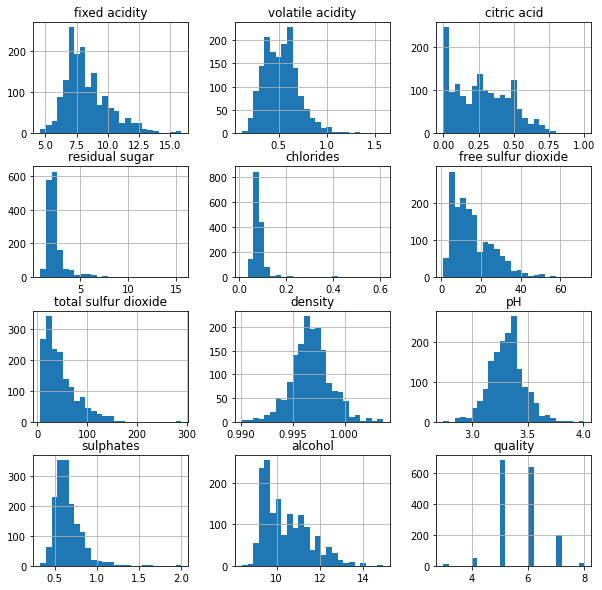

In [58]:
df.hist(bins=25,figsize=(10,10))
plt.show()

Text(0.5, 1.0, 'quality vs citric acid')

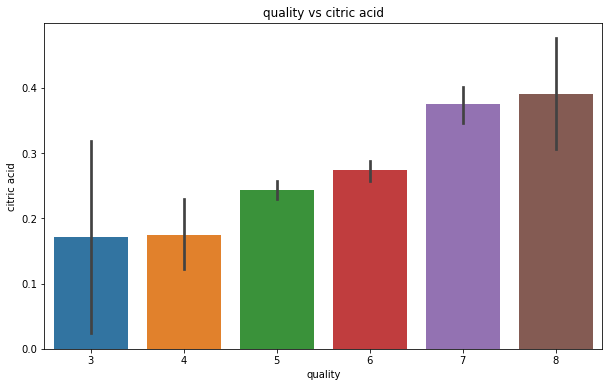

In [59]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = 'citric acid', data = df )
plt.title("quality vs citric acid")


Text(0.5, 1.0, 'quality vs chlorides')

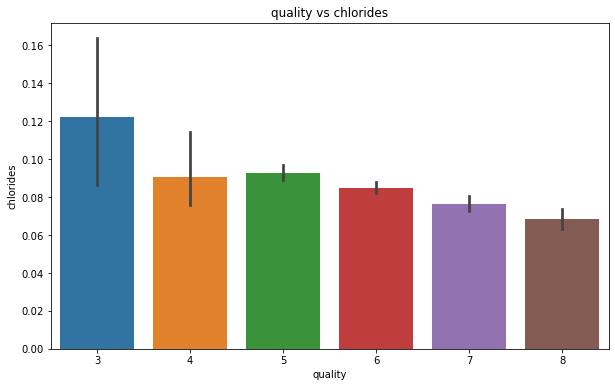

In [67]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)
plt.title("quality vs chlorides")

Text(0.5, 1.0, 'quality vs sulphates')

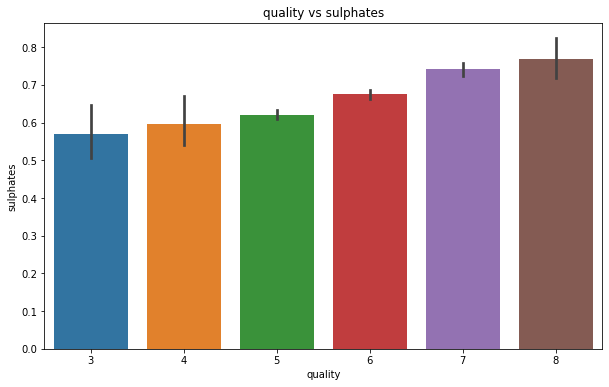

In [68]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)
plt.title("quality vs sulphates")

### Correlation:-
For checking correlation we use a statistical method that finds the bonding and relationship between two features.

<AxesSubplot:>

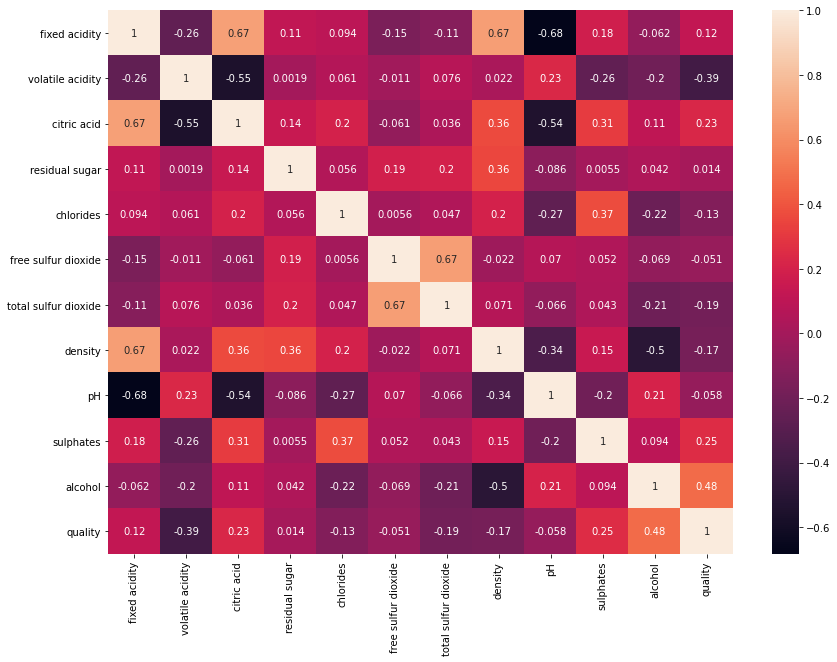

In [10]:
# ploting heatmap
plt.figure(figsize=[14,10])
sns.heatmap(df.corr(),annot=True)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
df["Quality_rating"] = [1 if x>=7 else 0 for x in df["quality"]]

In [62]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality_rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [63]:
df["Quality_rating"].value_counts()

0    1382
1     217
Name: Quality_rating, dtype: int64

<AxesSubplot:xlabel='Quality_rating', ylabel='count'>

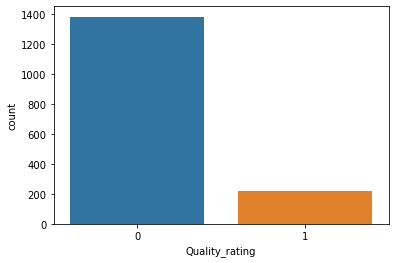

In [64]:
sns.countplot(df.Quality_rating)

In [66]:
df.data = df.drop("quality", axis = "columns")
df.data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality_rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


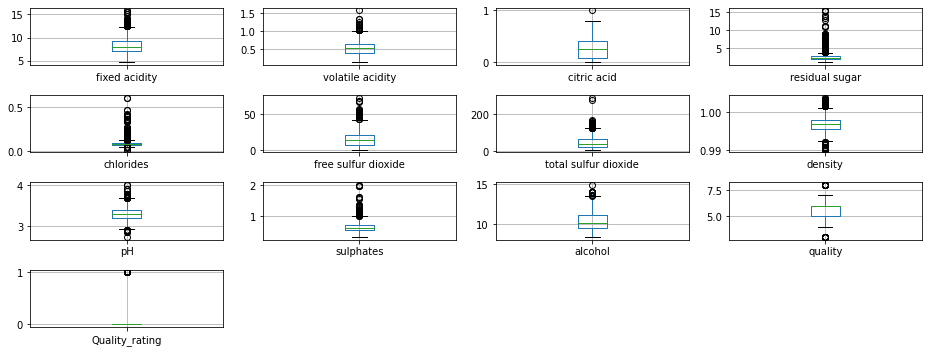

In [65]:
# Separate feature variables and target variable
df.plot(kind='box',subplots=True,grid=True,layout = (4,4),figsize = (13,5))
plt.tight_layout()
plt.show()

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [19]:
#Now seperate the dataset as response variable and feature variabes
x = df.drop(['Good_quality'], axis = 1)
y = df['Good_quality']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

## Scalling the features
We perform the normalization to convert all the features into the same scale. RobustScaler is one such technique where we scale all the features in the scale between -1 to +1

<AxesSubplot:ylabel='Density'>

<Figure size 1008x720 with 0 Axes>

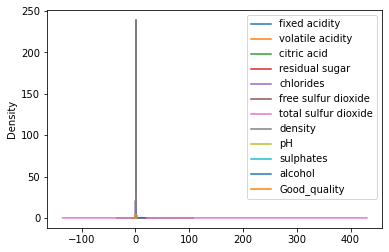

In [21]:
plt.figure(figsize=[14,10])
df.plot.kde()

the above plot shows us that all the features are in different scale. so, we need to bring them to the same scale.

In [22]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()  
df1=sc.fit_transform(x)
df_scaled = pd.DataFrame(df1 ,columns = df.columns[:-1])

<AxesSubplot:ylabel='Density'>

<Figure size 1008x720 with 0 Axes>

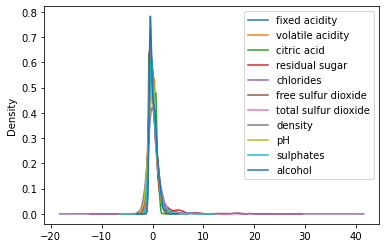

In [23]:
plt.figure(figsize=[14,10])
df_scaled.plot.kde()

All the fearures are now scaled down from +1 to -1

#### Model 1: Decision Tree

In [88]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1,max_depth = 6)
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       272
           1       0.79      0.54      0.64        48

    accuracy                           0.91       320
   macro avg       0.86      0.76      0.80       320
weighted avg       0.90      0.91      0.90       320



In [95]:
print("Training score: ", model1.score(x_train, y_train))
print("Testing score: ", model1.score(x_test, y_test))

Training score:  0.9538702111024238
Testing score:  0.909375


### Hyper parameter tuning for Decsion tree

In [25]:
param_grid_array = {"criterion" : ["gini", "entropy"],
                    "max_depth" : range(4,10),
                    "max_features" :['auto', 'sqrt', 'log2', None]
                   }

grid_search = GridSearchCV(model1,param_grid = param_grid_array,n_jobs = -1,cv = 5)
grid_search.fit(x,y)


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6, random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 10),
                         'max_features': ['auto', 'sqrt', 'log2', None]})

In [26]:
model_accuracy = {}
model_accuracy['Decision Tree'] =  grid_search.best_score_

In [27]:
from io import StringIO
import pydotplus
from PIL import Image
from IPython.display import Image
from six import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz

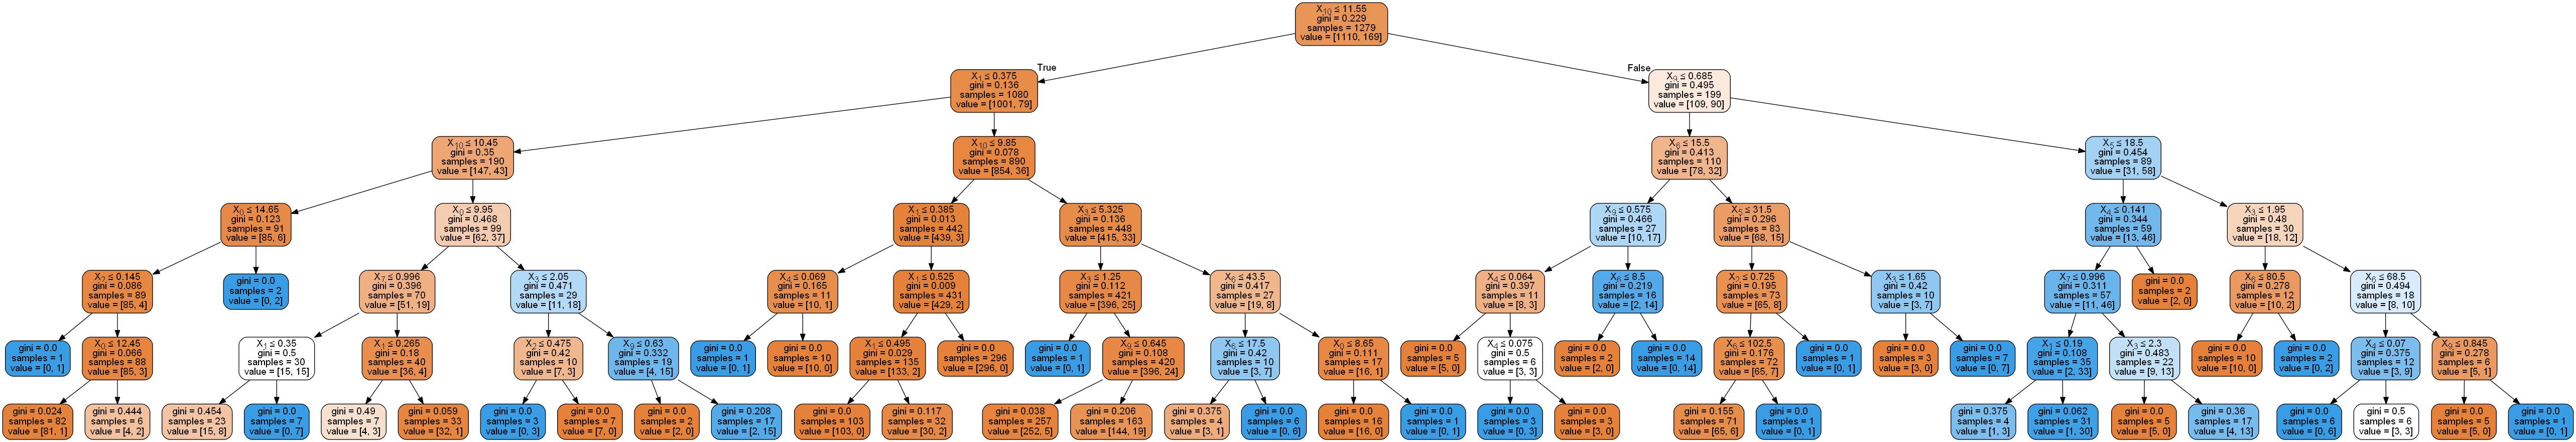

<Figure size 720x576 with 0 Axes>

In [28]:
plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(model1,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Cross validation report for Decision tree

In [29]:
#Cross_validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, x, y, cv =5)
print(scores)
print(scores.mean())

[0.878125   0.796875   0.8875     0.809375   0.85893417]
0.8461618338557994


## Model 2: Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

print(classification_report(y_test,y_pred2))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       272
           1       0.77      0.56      0.65        48

    accuracy                           0.91       320
   macro avg       0.85      0.77      0.80       320
weighted avg       0.90      0.91      0.90       320



## HyperParameterTuning for Random forest

In [31]:
random_state = 42
param_grid_array = {"n_estimators" :[200],
                    "criterion" : ["gini", "entropy"],
                    "max_depth" : range(4,10),
                    "max_features" :['auto', 'sqrt', 'log2', None],
                    "bootstrap": [True, False]
                   }

grid_search = GridSearchCV(model2,param_grid = param_grid_array,n_jobs = -1,cv = 5)
grid_search.fit(x,y)
print(grid_search.best_params_)
print(grid_search.best_score_)
model_accuracy['Random forest'] =  grid_search.best_score_

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.8811794670846395


In [107]:
model2 = RandomForestClassifier(bootstrap= False, criterion= "gini", max_depth= 4, max_features= 'sqrt', n_estimators= 200)
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

In [108]:
print("Training score: ", model2.score(x_train, y_train))
print("Testing score: ", model2.score(x_test, y_test))

Training score:  0.9093041438623924
Testing score:  0.884375


## Cross validation report for Random forest

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, x, y, cv =5)
print(scores)
print(scores.mean())

[0.875      0.85       0.86875    0.8625     0.88087774]
0.8674255485893416


In [35]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true = y_test, y_pred= y_pred1)
print(cf_matrix)

[[265   7]
 [ 22  26]]


<AxesSubplot:>

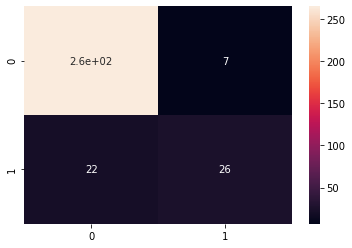

In [36]:

sns.heatmap(cf_matrix, annot=True)


In [37]:
kurt = df.kurt()
kurt

fixed acidity            1.132143
volatile acidity         1.225542
citric acid             -0.788998
residual sugar          28.617595
chlorides               41.715787
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
Good_quality             2.537360
dtype: float64

## Support vector classifier

In [38]:
from sklearn import svm
model3 = svm.SVC()
model3.fit(x_train,y_train)

SVC()

In [39]:
y_pred3 = model3.predict(x_test)

In [40]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       272
           1       0.00      0.00      0.00        48

    accuracy                           0.85       320
   macro avg       0.42      0.50      0.46       320
weighted avg       0.72      0.85      0.78       320



In [41]:
model3.score(x_test,y_test)

0.85

## Using GrichSearchCV for Hyperparameter tuning

In [42]:
param = {
    'C': [0.9,1,1.1,1.2,1.3],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1]
}
grid_svc = GridSearchCV(model3, param_grid=param, scoring='accuracy', cv=10)

In [43]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.9, 1, 1.1, 1.2, 1.3],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [44]:
grid_svc.best_params_

{'C': 1, 'gamma': 0.8, 'kernel': 'rbf'}

In [45]:
model_accuracy['SVC'] =  grid_search.best_score_

model_accuracy

{'Decision Tree': 0.8636559561128527,
 'Random forest': 0.8811794670846395,
 'SVC': 0.8811794670846395}

In [113]:
# Tuning the model with the best params we got

model3 = svm.SVC(C= 1, gamma= 0.8, kernel= 'rbf')
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       272
           1       0.85      0.23      0.36        48

    accuracy                           0.88       320
   macro avg       0.86      0.61      0.65       320
weighted avg       0.87      0.88      0.85       320



In [114]:
print("Training score: ", model3.score(x_train, y_train))
print("Testing score: ", model3.score(x_test, y_test))

Training score:  0.983580922595778
Testing score:  0.878125


## Cross validation report for SVC

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model3, x, y, cv =5)
print(scores)
print(scores.mean())

[0.865625   0.85625    0.871875   0.840625   0.86833856]
0.8605427115987461


In [48]:
model_accuracy

{'Decision Tree': 0.8636559561128527,
 'Random forest': 0.8811794670846395,
 'SVC': 0.8811794670846395}

### Lets see which classifier performed better.

In [49]:
Best_accuracy = pd.DataFrame({'Classifier': model_accuracy.keys(),
                            'Accuracy': model_accuracy.values()})
Best_accuracy

,Classifier,Accuracy
0,Decision Tree,0.863656
1,Random forest,0.881179
2,SVC,0.881179


Text(0.5, 1.0, 'Choosing the best model')

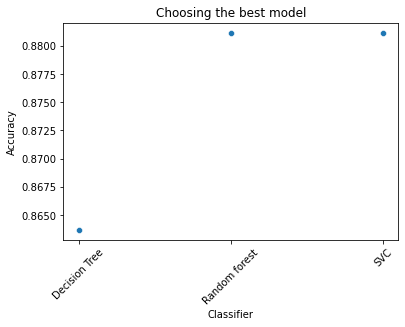

In [50]:
sns.scatterplot(Best_accuracy.Classifier,Best_accuracy.Accuracy)
plt.xticks(rotation=45)
plt.title("Choosing the best model")

## The winner is Random forest Classifier!